## Import necessary Libraries

In [1]:
!pip install skimpy summarytools

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix
from skimpy import skim
from summarytools import dfSummary

In [3]:
url = "https://docs.google.com/spreadsheets/d/1bwQyhW4bPA04sPy8JppZft_sM8O-j-DK06UDYR813Ik/export?format=csv&gid=0"
df = pd.read_csv(url)
df.head()

,Area,Data Collection Year,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,2005,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,2005,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,2005,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95
3,Mithpukur,2005,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.0
4,Mithpukur,2005,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04


In [4]:
df.tail(20)

,Area,Data Collection Year,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
598,Taraganj Thana,1997,Kaunia,Medium high land,NaN,5.2,2.67,0.14,0.15,9,26,0.60,0.62
599,Taraganj Thana,1997,Kaunia,Medium high land,NaN,5.4,2.05,0.13,0.15,11,17,0.29,0.52
600,Taraganj Thana,1997,Kaunia,Medium high land,NaN,5.4,1.44,0.09,0.09,9,13,0.29,0.88
601,Taraganj Thana,1997,Bhimpur,Medium high land,NaN,5.3,2.67,0.15,0.12,22,25,0.49,0.66
602,Taraganj Thana,1997,Bhimpur,Medium high land,NaN,5.4,1.93,0.12,0.12,8,15,0.46,0.62
603,Taraganj Thana,1997,Bhimpur,Medium high land,NaN,6.0,2.29,0.11,0.09,5,12,0.24,0.56
604,Taraganj Thana,1997,Bhimpur,Medium high land,NaN,6.1,1.57,0.10,0.23,6,13,0.17,0.66
605,Taraganj Thana,1997,Bhimpur,Medium high land,NaN,5.6,2.67,0.15,0.16,13,15,0.30,0.78
606,Taraganj Thana,1997,Indrail,Medium high land,NaN,5.7,2.79,0.16,0.25,0.26,16,0.57,0.82
607,Taraganj Thana,1997,Imadpur,Medium high land,NaN,5.7,2.16,0.14,0.33,16,16,0.35,0.72


## EDA

In [5]:
#get summary of dataframe using dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Area[object],1. Mithpukur2. Pirgacha 3. Kaunia upazila4. Taraganj Thana5. Gangachara,213 (34.5%)149 (24.1%)99 (16.0%)97 (15.7%)60 (9.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACRklEQVR4nO3bQWrbUBiF0V9FhGYiYQxejBfRxXYR2o0x1qAJmaiDYprQSRzLV0I9ZwXP8CHzhG4zTVNBwrelD8D/Q2zEiI2Ypqqeq+pp6YPM7G2appelD8FH7X6//9F13W7pg8xpHMdz0zQ/Bbcubdd1u+Px+NL3/evSh5nD5XL5PgzD7nQ6PVWV2Fakrarq+/71cDj8WvowM3pe+gD8ywWBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ihpq/58lrP0Qeaypd+yNe04judhGHa1oc9yxnE8V9Xb0ufgI5+FE9PYjZLigkDMWv9G/Q1u0CrXVdZR27S6dZV11HatdV21mdcw/OWCQIzYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzErG5dtaazMK9Vrquso7bJZ+HEWFcR44JATOpv1N8imXWVtRRVgXWVtRRXqXXVal6rsBwXBGLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIj5uHrKmspriLrKmspqnwWTpB1FTGJJ5unGlUVGLwYu3D10MGLsQvvJQYvxi5UlZe6BImNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ih56LrKsor3Hr6usqziygaBGOsqYu59snlq8Wl3rassp7jFl9dVllPc6t51leUUn+alLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZivryuspziVnetqyynuIUNAjHWVcS4IBAjNmJ+A1L8Djfy3+MbAAAAAElFTkSuQmCC"">",0(0.0%)
2,Data Collection Year[int64],1. 20052. 20163. 19974. 1990,362 (58.6%)99 (16.0%)97 (15.7%)60 (9.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB60lEQVR4nO3bQWrjQBRF0a/GhM5Ewhi8GC+iF9uL0G6MsQadkIl6YAwZxjF6BalzVlCYi4xEvWFd14KEX60PQD/ERsxQVa9V9dL6IJ34WNf1rfUhWtkdDoc/4zjuWx+kB8uyXIZh+NtrcLtxHPen0+ltmqb31of5ya7X6+95nvfn8/mlqvqMrapqmqb34/H4r/VhOvDa+gAteUEgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmJ2VbfrL60P8tP5jat2y7Jc5nneV+fXXxKWZblU1Ufrc7TiWnhW19fCB1M+UrwgEJP6G+3674ObyLqq91URN5uvq6yKuEutq3xWwQsCOWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmI2n/KZsHEXmfL1PmHjxgaBGFM+YhJPNk81qiqwrrKs4m7TdZVlFZ8l1lWWVVSVj7oEiY0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiNl0XWVZxWebr6ssq7izQSDGuoqYZ59snlp82VPrKsspHvHtdZXlFI96dl1lOcWX+ahLjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZhvr6ssp3jUU+sqyykeYYNAjHUVMV4QiPkPs1jYuW+7IQUAAAAASUVORK5CYII="">",0(0.0%)
3,soil group[object],1. Gangachara2. Palashbari3. Kaunia4. Alluvial soil of Teesta5. Pirgacha6. Berries7. belab8. the moon9. Sahapur10. Noadda11. other,238 (38.5%)66 (10.7%)63 (10.2%)39 (6.3%)36 (5.8%)32 (5.2%)20 (3.2%)18 (2.9%)16 (2.6%)15 (2.4%)75 (12.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEKElEQVR4nO3dQWobWQBF0VIjQmciYQxejBfRi+1FaDfGWINOyEQ96JGRbJVTv64adM4CQgUuX1TxX7I5nU4TFP649QNwP8RGRmxkxEZGbGTERkZsZMRGRmxkNtM0fZ+m6dutHyT063Q6/bj1Q9yj7ePj41+73e7h1g9SOR6Pr5vN5m/B9ba73e7h+fn5x36//3nrh1nb29vbn4fD4eHl5eXbNE1ii22naZr2+/3Pp6enf279MJHvt36Ae+UFgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyGyn6b97Xrd+kMK9/D3/r7bH4/H1cDg8THdyz+t4PL5O0/Tr1s9xj2wQyGz8k1lURp1sTguuGrKuslhijsXrKosl5hq1rrqLN1mW8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzOLBixEJcw0ZvBiRMIdr4WQMXsiMONmcasyyePBi7MJciwYvxi58xYjBi7ELs/ioS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmbR4MXYha9YPHgxdmEu18LJGLyQ8YJA5is/o34uWWT2usqKiqVmrausqBjhK+sqKyoW8YJARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGZta6yoqKEWavq6yoWMq1cDLWVWTmnmxONRabNXgxdmGEq4MXYxdGmTt4MXZhMR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFwdvBi7MMqswYuxCyO4Fk7G4IXMnJPNqcYQVwcvxi6M8ungxdiFkeYMXoxdGMJHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI/PpusqyipGurqssqxjFBoGMdRWZj042pxnDXVxXWVSxhrN1lUUVa/loXWVRxXA+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZE5G7wYubCWi4MXIxfW4Fo4GYMXMk42MgYvZAxeyBi8kPFRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKuhZMxeCHjBYHMpZ9RP6Gs4mxdZVnFWt6tqyyrWNOldZVlFavwgkBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbm3brKsoo1na2rLKtYi2vhZKyryDjZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsi4Fk7G4IXMR/9R2u9yKvKhs8HLEsYyfObd4GXJH2QswzWXBi9LGMvwI

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   Data Collection Year   618 non-null    int64  
 2   soil group             618 non-null    object 
 3   Land class             618 non-null    object 
 4   knit (surface)         461 non-null    object 
 5   pH                     618 non-null    object 
 6   SOC (%)                618 non-null    float64
 7   Nitrogen N (%)         618 non-null    object 
 8   Potassium K (meq/100)  618 non-null    object 
 9   Phosphorus P (ug/g)    618 non-null    object 
 10  Sulfur S (ug/g)        618 non-null    object 
 11  Boron B (ug/g)         618 non-null    object 
 12  Zinc Zn (ug/g)         618 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 62.9+ KB


In [7]:
# Drop the 'Data Collection Year' column
df = df.drop(columns=['Data Collection Year'])
df.info()

# # Update numerical_cols after dropping 'Data Collection Year'
# numerical_cols.remove('Data Collection Year')
# df.info()

# # Print the updated numerical columns
# print(numerical_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   soil group             618 non-null    object 
 2   Land class             618 non-null    object 
 3   knit (surface)         461 non-null    object 
 4   pH                     618 non-null    object 
 5   SOC (%)                618 non-null    float64
 6   Nitrogen N (%)         618 non-null    object 
 7   Potassium K (meq/100)  618 non-null    object 
 8   Phosphorus P (ug/g)    618 non-null    object 
 9   Sulfur S (ug/g)        618 non-null    object 
 10  Boron B (ug/g)         618 non-null    object 
 11  Zinc Zn (ug/g)         618 non-null    object 
dtypes: float64(1), object(11)
memory usage: 58.1+ KB


In [8]:
# Define categorical and numerical columns
categorical_cols = ['Area', 'soil group', 'Land class', 'knit (surface)']
numerical_cols = ['pH', 'SOC (%)', 'Nitrogen N (%)',
                  'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)',
                  'Boron B (ug/g)', 'Zinc Zn (ug/g)']

# Convert numerical columns to floats (handle non-numeric values as NaN)
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to 'category' data type
df[categorical_cols] = df[categorical_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Area                   618 non-null    category
 1   soil group             618 non-null    category
 2   Land class             618 non-null    category
 3   knit (surface)         461 non-null    category
 4   pH                     616 non-null    float64 
 5   SOC (%)                618 non-null    float64 
 6   Nitrogen N (%)         610 non-null    float64 
 7   Potassium K (meq/100)  616 non-null    float64 
 8   Phosphorus P (ug/g)    616 non-null    float64 
 9   Sulfur S (ug/g)        617 non-null    float64 
 10  Boron B (ug/g)         591 non-null    float64 
 11  Zinc Zn (ug/g)         617 non-null    float64 
dtypes: category(4), float64(8)
memory usage: 43.0 KB


In [9]:
# check for missing values
df.isnull().sum()

,0
Area,0
soil group,0
Land class,0
knit (surface),157
pH,2
SOC (%),0
Nitrogen N (%),8
Potassium K (meq/100),2
Phosphorus P (ug/g),2
Sulfur S (ug/g),1


In [10]:
# drop null values in target features
df.dropna(subset=['SOC (%)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)'], inplace=True)
#drop all null values in training features
df.dropna(subset=['Nitrogen N (%)', 'pH', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)'], inplace=True)
# recheck for missing values
df.isnull().sum()

,0
Area,0
soil group,0
Land class,0
knit (surface),127
pH,0
SOC (%),0
Nitrogen N (%),0
Potassium K (meq/100),0
Phosphorus P (ug/g),0
Sulfur S (ug/g),0


In [11]:
# # Replace specific non-numeric values with empty strings
# df['Nitrogen N (%)'] = df['Nitrogen N (%)'].replace(['Very Low', '------'], '')
# df['Boron B (ug/g)'] = df['Boron B (ug/g)'].replace(['Very Low', '------'], '')
# df['Phosphorus P (ug/g)'] = df['Phosphorus P (ug/g)'].replace(['Very Low', '------'], '')

# df.isnull().sum()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 616
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Area                   581 non-null    category
 1   soil group             581 non-null    category
 2   Land class             581 non-null    category
 3   knit (surface)         454 non-null    category
 4   pH                     581 non-null    float64 
 5   SOC (%)                581 non-null    float64 
 6   Nitrogen N (%)         581 non-null    float64 
 7   Potassium K (meq/100)  581 non-null    float64 
 8   Phosphorus P (ug/g)    581 non-null    float64 
 9   Sulfur S (ug/g)        581 non-null    float64 
 10  Boron B (ug/g)         581 non-null    float64 
 11  Zinc Zn (ug/g)         581 non-null    float64 
dtypes: category(4), float64(8)
memory usage: 45.0 KB


In [12]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Area                   581 non-null    category
 1   soil group             581 non-null    category
 2   Land class             581 non-null    category
 3   knit (surface)         454 non-null    category
 4   pH                     581 non-null    float64 
 5   SOC (%)                581 non-null    float64 
 6   Nitrogen N (%)         581 non-null    float64 
 7   Potassium K (meq/100)  581 non-null    float64 
 8   Phosphorus P (ug/g)    581 non-null    float64 
 9   Sulfur S (ug/g)        581 non-null    float64 
 10  Boron B (ug/g)         581 non-null    float64 
 11  Zinc Zn (ug/g)         581 non-null    float64 
dtypes: category(4), float64(8)
memory usage: 40.6 KB


In [13]:
df.head()

,Area,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95
3,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00
4,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04


## Data Visualization

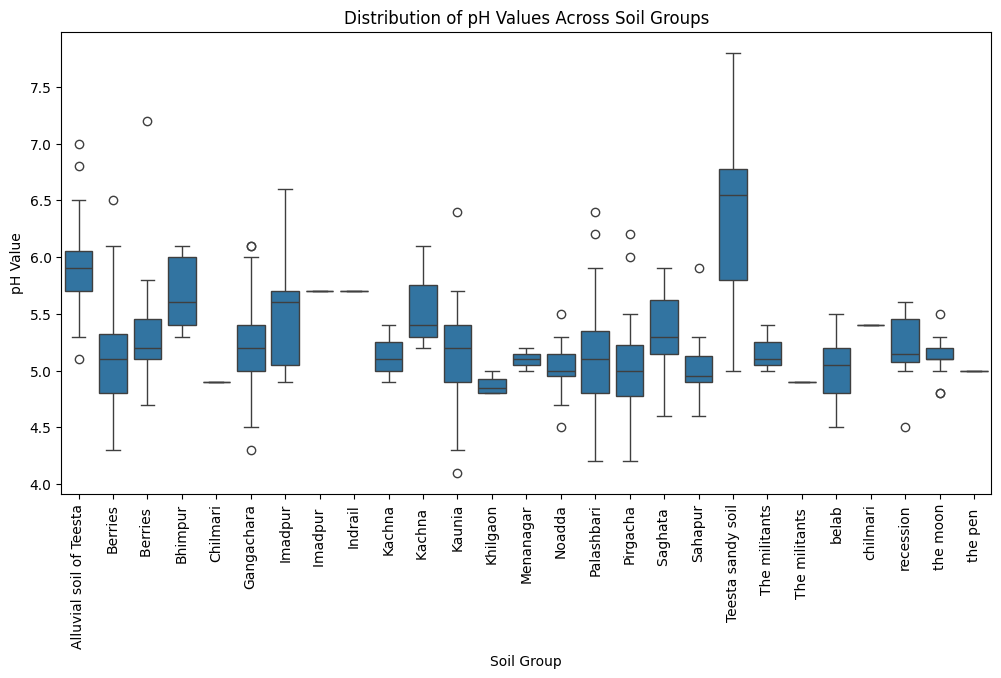

In [14]:
# @title Distribution of pH Values Across Soil Groups

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='soil group', y='pH', data=df)
plt.xticks(rotation=90)
plt.xlabel('Soil Group')
plt.ylabel('pH Value')
_ = plt.title('Distribution of pH Values Across Soil Groups')

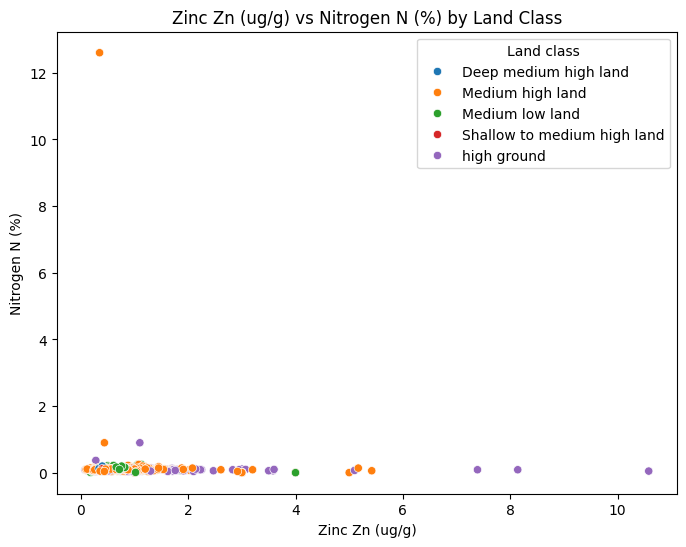

In [15]:
# @title Zinc Zn (ug/g) vs Nitrogen N (%) by Land Class

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Zinc Zn (ug/g)', y='Nitrogen N (%)', hue='Land class', data=df)
plt.xlabel('Zinc Zn (ug/g)')
plt.ylabel('Nitrogen N (%)')
_ = plt.title('Zinc Zn (ug/g) vs Nitrogen N (%) by Land Class')

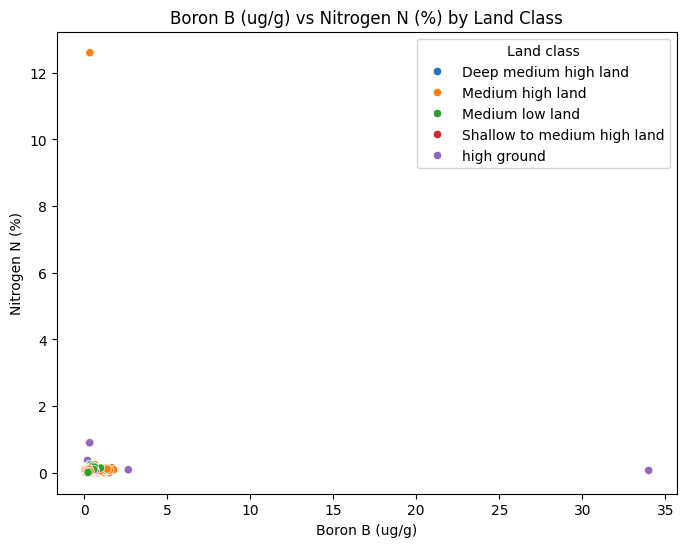

In [16]:
# @title Boron B (ug/g) vs Nitrogen N (%) by Land Class

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Boron B (ug/g)', y='Nitrogen N (%)', hue='Land class', data=df)
plt.xlabel('Boron B (ug/g)')
plt.ylabel('Nitrogen N (%)')
_ = plt.title('Boron B (ug/g) vs Nitrogen N (%) by Land Class')

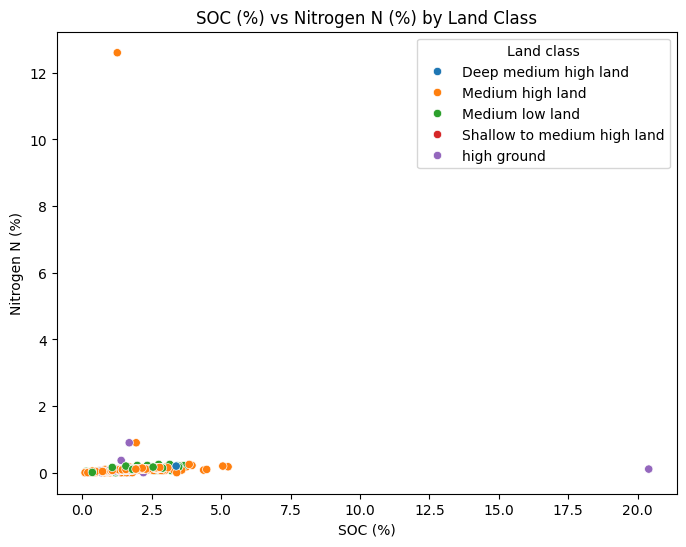

In [17]:
# @title SOC (%) vs Nitrogen N (%) by Land Class

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='SOC (%)', y='Nitrogen N (%)', hue='Land class', data=df)
plt.xlabel('SOC (%)')
plt.ylabel('Nitrogen N (%)')
_ = plt.title('SOC (%) vs Nitrogen N (%) by Land Class')

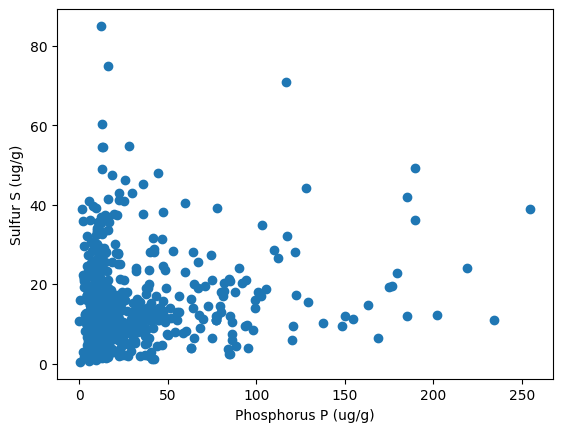

In [18]:
# @title Phosphorus P (ug/g) vs Sulfur S (ug/g)

import matplotlib.pyplot as plt

plt.scatter(df['Phosphorus P (ug/g)'], df['Sulfur S (ug/g)'])
plt.xlabel('Phosphorus P (ug/g)')
_ = plt.ylabel('Sulfur S (ug/g)')

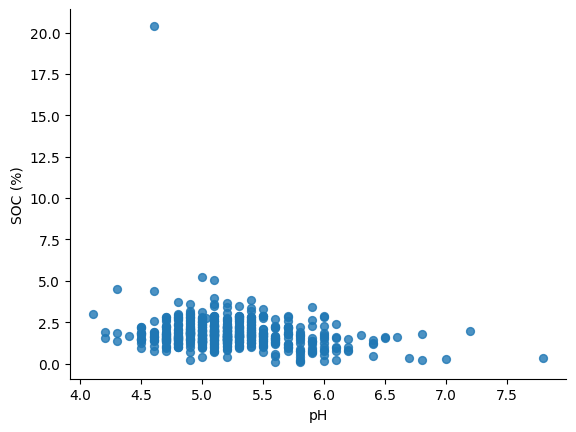

In [19]:
# @title pH vs SOC (%)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pH', y='SOC (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Initial Model Building and Eval

In [20]:
# # Update the numerical columns
# numerical_cols = ['pH', 'SOC (%)', 'Nitrogen N (%)',
#                   'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)',
#                   'Boron B (ug/g)', 'Zinc Zn (ug/g)']

In [21]:
# Features and targets
X = df.drop(['SOC (%)', 'Zinc Zn (ug/g)', 'Boron B (ug/g)'], axis=1)
y = df[['SOC (%)', 'Zinc Zn (ug/g)', 'Boron B (ug/g)']]

In [22]:
X.head()

,Area,soil group,Land class,knit (surface),pH,Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g)
0,Mithpukur,belab,high ground,Clay loam,5.0,0.08,0.15,19.6,37.7
1,Mithpukur,belab,high ground,Clay loam,4.9,0.09,0.25,4.1,32.0
2,Mithpukur,belab,high ground,Clay loam,4.6,0.05,0.09,13.3,13.5
3,Mithpukur,belab,high ground,Clay loam,5.2,0.06,0.30,20.2,30.0
4,Mithpukur,belab,high ground,Clay loam,5.3,0.11,0.17,20.5,27.8


In [23]:
X.isnull().sum()

,0
Area,0
soil group,0
Land class,0
knit (surface),127
pH,0
Nitrogen N (%),0
Potassium K (meq/100),0
Phosphorus P (ug/g),0
Sulfur S (ug/g),0


In [24]:
print(y.head())

   SOC (%)  Zinc Zn (ug/g)  Boron B (ug/g)
0     1.27            0.86            0.26
1     1.47            0.75            0.25
2     1.07            0.95            0.27
3     1.51            1.00            0.28
4     1.08            1.04            0.30


In [25]:
# Define numerical and categorical columns
numerical_cols = ['pH', 'Nitrogen N (%)', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)']
categorical_cols = ['Area', 'soil group', 'Land class', 'knit (surface)']

In [26]:
# # Label encode categorical columns temporarily for KNNImputer compatibility
# label_encoders = {col: LabelEncoder() for col in categorical_cols}
# for col in categorical_cols:
#     X[col] = label_encoders[col].fit_transform(X[col].astype(str))

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Area                   581 non-null    category
 1   soil group             581 non-null    category
 2   Land class             581 non-null    category
 3   knit (surface)         454 non-null    category
 4   pH                     581 non-null    float64 
 5   Nitrogen N (%)         581 non-null    float64 
 6   Potassium K (meq/100)  581 non-null    float64 
 7   Phosphorus P (ug/g)    581 non-null    float64 
 8   Sulfur S (ug/g)        581 non-null    float64 
dtypes: category(4), float64(5)
memory usage: 27.0 KB


In [36]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the preprocessor with IterativeImputer for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10), max_iter=10, random_state=42)),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
            ('imputer', KNNImputer(n_neighbors=5)),
        ]), categorical_cols)
    ]
)

# Define the model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

# Fit the pipeline with default model (before hyperparameter tuning)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10),
                                                                                    random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pH', 'Nitrogen N (%)',
                                                   'Potassium K (meq/100)',
                                                   'Phosphorus P (ug/g)',
                                                   'Sulfur S (ug/g)']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unkn...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [37]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.20178472268090256
Root Mean Squared Error: 0.44920454436804463
R-squared: 0.32792651653289795


In [38]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify skewed numerical features
skewed_features = X_train[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features = skewed_features[skewed_features > 0.75].index  # Adjust threshold if necessary

# Define the preprocessor with specific transformers for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        # Numerical pipeline with log transformation for skewed features
        ('num', Pipeline(steps=[
            ('imputer', IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10), max_iter=10, random_state=42)),
            ('log', FunctionTransformer(np.log1p, validate=True)),  # Apply log transformation
            ('scaler', StandardScaler())
        ]), skewed_features),  # Apply to skewed numerical features only

        # Pipeline for remaining numerical features without log transformation
        ('num_rest', Pipeline(steps=[
            ('imputer', IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10), max_iter=10, random_state=42)),
            ('scaler', StandardScaler())
        ]), [col for col in numerical_cols if col not in skewed_features]),

        # Categorical pipeline
        ('cat', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),  # encoding first to avoid data leakage and error
            ('imputer', KNNImputer(n_neighbors=5)),  # Handle missing values in categorical features
        ]), categorical_cols)
    ]
)

# Define the model pipeline with the preprocessor and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10),
                                                                                    random_state=42)),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Nitrogen N (%)', 'Potassium K (meq/100)', 'Phosphorus P (ug/g)',
       'Sulfur S (ug/g...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [39]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.17223942957989724
Root Mean Squared Error: 0.4150173846718921
R-squared: 0.4314657747745514


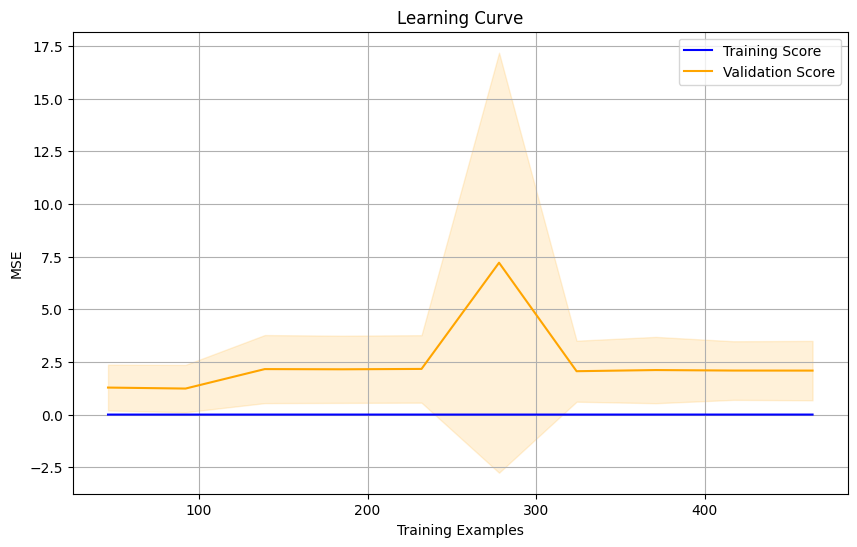

In [40]:
# Calculate learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert scores to positive values
train_scores = -train_scores
test_scores = -test_scores

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.grid(True)
plt.show()

After applying the log transformation in my preprocessor to address the skewed distribution of numerical features, I saw an improvement in Mean Squared Error, Root Mean Squared Error, and R-squared.  

Here’s a quick breakdown of what these metrics imply for my model's performance:

- **Mean Squared Error (MSE)**: A lower MSE suggests that my model's predictions are closer to the actual values, which is a positive outcome.
  
- **Root Mean Squared Error (RMSE)**: The RMSE provides a measure of the average error in the same units as my target variable, making it easier to interpret. An RMSE of 0.415 indicates that, on average, my predictions are off by about 0.415 units from the actual values.
  
- **R-squared**: An R-squared value of approximately 0.431 suggests that around 43% of the variance in the target variable is explained by my model. While this might not seem high, it can be quite acceptable depending on the complexity of my dataset and the nature of the target variable.


The training data fits too well and need to be worked on so here are some of the next steps I will be taking:
### Next Steps
- **Model Tuning**: I can consider tuning hyperparameters for the `XGBRegressor` to see if I can improve performance further.
  
- **Feature Engineering**: I might explore additional feature engineering to capture more relationships in the data that could improve the model.

- **Cross-Validation**: Implementing cross-validation will help ensure that my model’s performance is consistent across different subsets of the data.

Let me know if you'd like any more details on these steps!